# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [187]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Ingest Data  

In [188]:
df = pd.read_excel("World military power.xlsx")

# EDA

## Convert multi index columns to one level

In [189]:
df.columns = df.iloc[0, :]
df.drop(df.index[0], inplace=True)

## Implement basic steps to see how is your data looks like

In [190]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

In [191]:
df.shape

(138, 60)

In [192]:
df2 = df.copy()

## Detect and drop duplicated columns

In [193]:
list = df.columns

In [194]:
i = 2
while i < 60:
    df.drop(list[i], axis=1, inplace=True)
    i += 2


In [195]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
5,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


In [196]:
df.describe()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138,138.0000,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,124.0,115.0,115.0,115.0,115.0,138,138,138.0,138.0,138.0,138.0,138,138,138,109.0,138.0,129.0
unique,138,138.0000,113.0,63.0,38.0,49.0,77.0,97.0,45.0,106.0,130.0,70.0,91.0,68.0,78.0,5.0,20.0,11.0,18.0,124,138,108.0,88.0,102.0,84.0,138,138,138,104.0,92.0,125.0
top,Afghanistan,1.3444,19.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,50,00,00,000","2,84,00,00,000",18.0,0.0,18500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",853.0,0.0,443.0
freq,1,1.0000,5.0,46.0,75.0,15.0,25.0,4.0,63.0,24.0,4.0,52.0,24.0,46.0,14.0,102.0,74.0,103.0,61.0,3,1,3.0,46.0,4.0,46.0,1,1,1,2.0,38.0,2.0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

## Check for missing values 

In [198]:
nu = df.isnull().sum()
nu[nu > 0]

0
Navy Fleet Strengths value               14
Aircraft Carrier Fleet Strength value    23
Submarine Fleet Strength value           23
Destroyer Fleet Strength value           23
Frigate Fleet Strength value             23
Total Coastline Coverage value           29
Total Border Coverage value               9
dtype: int64

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [199]:
df.loc[df["Navy Fleet Strengths value"].isnull(),["Military Strength", "Navy Fleet Strengths value"]]

,Military Strength,Navy Fleet Strengths value
17,Botswana,NaN
20,Burkina Faso,NaN
24,Central African Republic,NaN
25,Chad,NaN
31,Czechia,NaN
39,Ethiopia,NaN
49,Hungary,NaN
63,Kyrgyzstan,NaN
72,Mali,NaN
75,Moldova,NaN


In [200]:
df["Navy Fleet Strengths value"].fillna(0, inplace=True)

In [201]:
df.loc[df["Aircraft Carrier Fleet Strength value"].isnull(),["Military Strength", "Aircraft Carrier Fleet Strength value"]]

,Military Strength,Aircraft Carrier Fleet Strength value
6,Armenia,NaN
8,Austria,NaN
12,Belarus,NaN
14,Bhutan,NaN
17,Botswana,NaN
20,Burkina Faso,NaN
24,Central African Republic,NaN
25,Chad,NaN
31,Czechia,NaN
39,Ethiopia,NaN


In [202]:
df["Aircraft Carrier Fleet Strength value"].fillna(0, inplace=True)

In [203]:
df.loc[df["Submarine Fleet Strength value"].isnull(),["Military Strength", "Submarine Fleet Strength value"]]

,Military Strength,Submarine Fleet Strength value
6,Armenia,NaN
8,Austria,NaN
12,Belarus,NaN
14,Bhutan,NaN
17,Botswana,NaN
20,Burkina Faso,NaN
24,Central African Republic,NaN
25,Chad,NaN
31,Czechia,NaN
39,Ethiopia,NaN


In [204]:
df["Submarine Fleet Strength value"].fillna(0, inplace=True)

In [205]:
df.loc[df["Destroyer Fleet Strength value"].isnull(),["Military Strength", "Destroyer Fleet Strength value"]]

,Military Strength,Destroyer Fleet Strength value
6,Armenia,NaN
8,Austria,NaN
12,Belarus,NaN
14,Bhutan,NaN
17,Botswana,NaN
20,Burkina Faso,NaN
24,Central African Republic,NaN
25,Chad,NaN
31,Czechia,NaN
39,Ethiopia,NaN


In [206]:
df.loc[df["Military Strength"] == "South Korea","Destroyer Fleet Strength value"] = 12
# https://en.wikipedia.org/wiki/Republic_of_Korea_Navy

In [207]:
df["Destroyer Fleet Strength value"].fillna(0, inplace=True)

In [208]:
df.loc[df["Frigate Fleet Strength value"].isnull(),["Military Strength", "Frigate Fleet Strength value"]]

,Military Strength,Frigate Fleet Strength value
6,Armenia,NaN
8,Austria,NaN
12,Belarus,NaN
14,Bhutan,NaN
17,Botswana,NaN
20,Burkina Faso,NaN
24,Central African Republic,NaN
25,Chad,NaN
31,Czechia,NaN
39,Ethiopia,NaN


In [209]:
df.loc[df["Military Strength"] == "South Korea","Frigate Fleet Strength value"] = 12
# https://en.wikipedia.org/wiki/Republic_of_Korea_Navy

In [210]:
df["Frigate Fleet Strength value"].fillna(0, inplace=True)

In [211]:
df.loc[df["Total Coastline Coverage value"].isnull(),["Military Strength", "Total Coastline Coverage value"]]

,Military Strength,Total Coastline Coverage value
6,Armenia,NaN
8,Austria,NaN
12,Belarus,NaN
14,Bhutan,NaN
15,Bolivia,NaN
17,Botswana,NaN
20,Burkina Faso,NaN
24,Central African Republic,NaN
25,Chad,NaN
31,Czechia,NaN


In [212]:
df["Total Coastline Coverage value"].fillna(0, inplace=True)

In [213]:
df.loc[df["Total Border Coverage value"].isnull(),["Military Strength", "Total Border Coverage value"]]

,Military Strength,Total Border Coverage value
7,Australia,NaN
10,Bahrain,NaN
58,Japan,NaN
70,Madagascar,NaN
84,New Zealand,NaN
96,Philippines,NaN
106,Singapore,NaN
114,Sri Lanka,NaN
120,Taiwan,NaN


In [214]:
df["Total Border Coverage value"].fillna(0, inplace=True)

In [215]:
nu = df.isnull().sum()
nu[nu > 0]

Series([], dtype: int64)

## Fix the dtypes

In [216]:
mil_str = df["Military Strength"]

In [217]:
df.drop("Military Strength", axis=1, inplace=True)

In [218]:
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


In [142]:
df2.loc[df2["Military Strength"] == "Turkey", "defense spending budget value"]

125    19,00,00,00,000
Name: defense spending budget value, dtype: object

In [144]:
df2.loc[df2["Military Strength"] == "Turkey", "Total Population value"]

125    8,12,57,239
Name: Total Population value, dtype: object

In [230]:
df.astype("object")
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


In [233]:
df.replace({",":""}, regex=True, inplace=True)
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43.0,0.0,5500.0,0.0,14325743,34940837,652230,0.0,1200.0,5987.0
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4.0,16000.0,42500.0,168300000,1519438,3057220,28748.0,362.0,41.0,691.0
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157.0,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0.0,6734.0
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176.0,1666000,82300.0,8273000000,6244205,30355880,1246700,1600.0,1300.0,5369.0
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138.0,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000.0,11968.0


In [234]:
df = df.apply(pd.to_numeric)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

<AxesSubplot:xlabel='0', ylabel='0'>

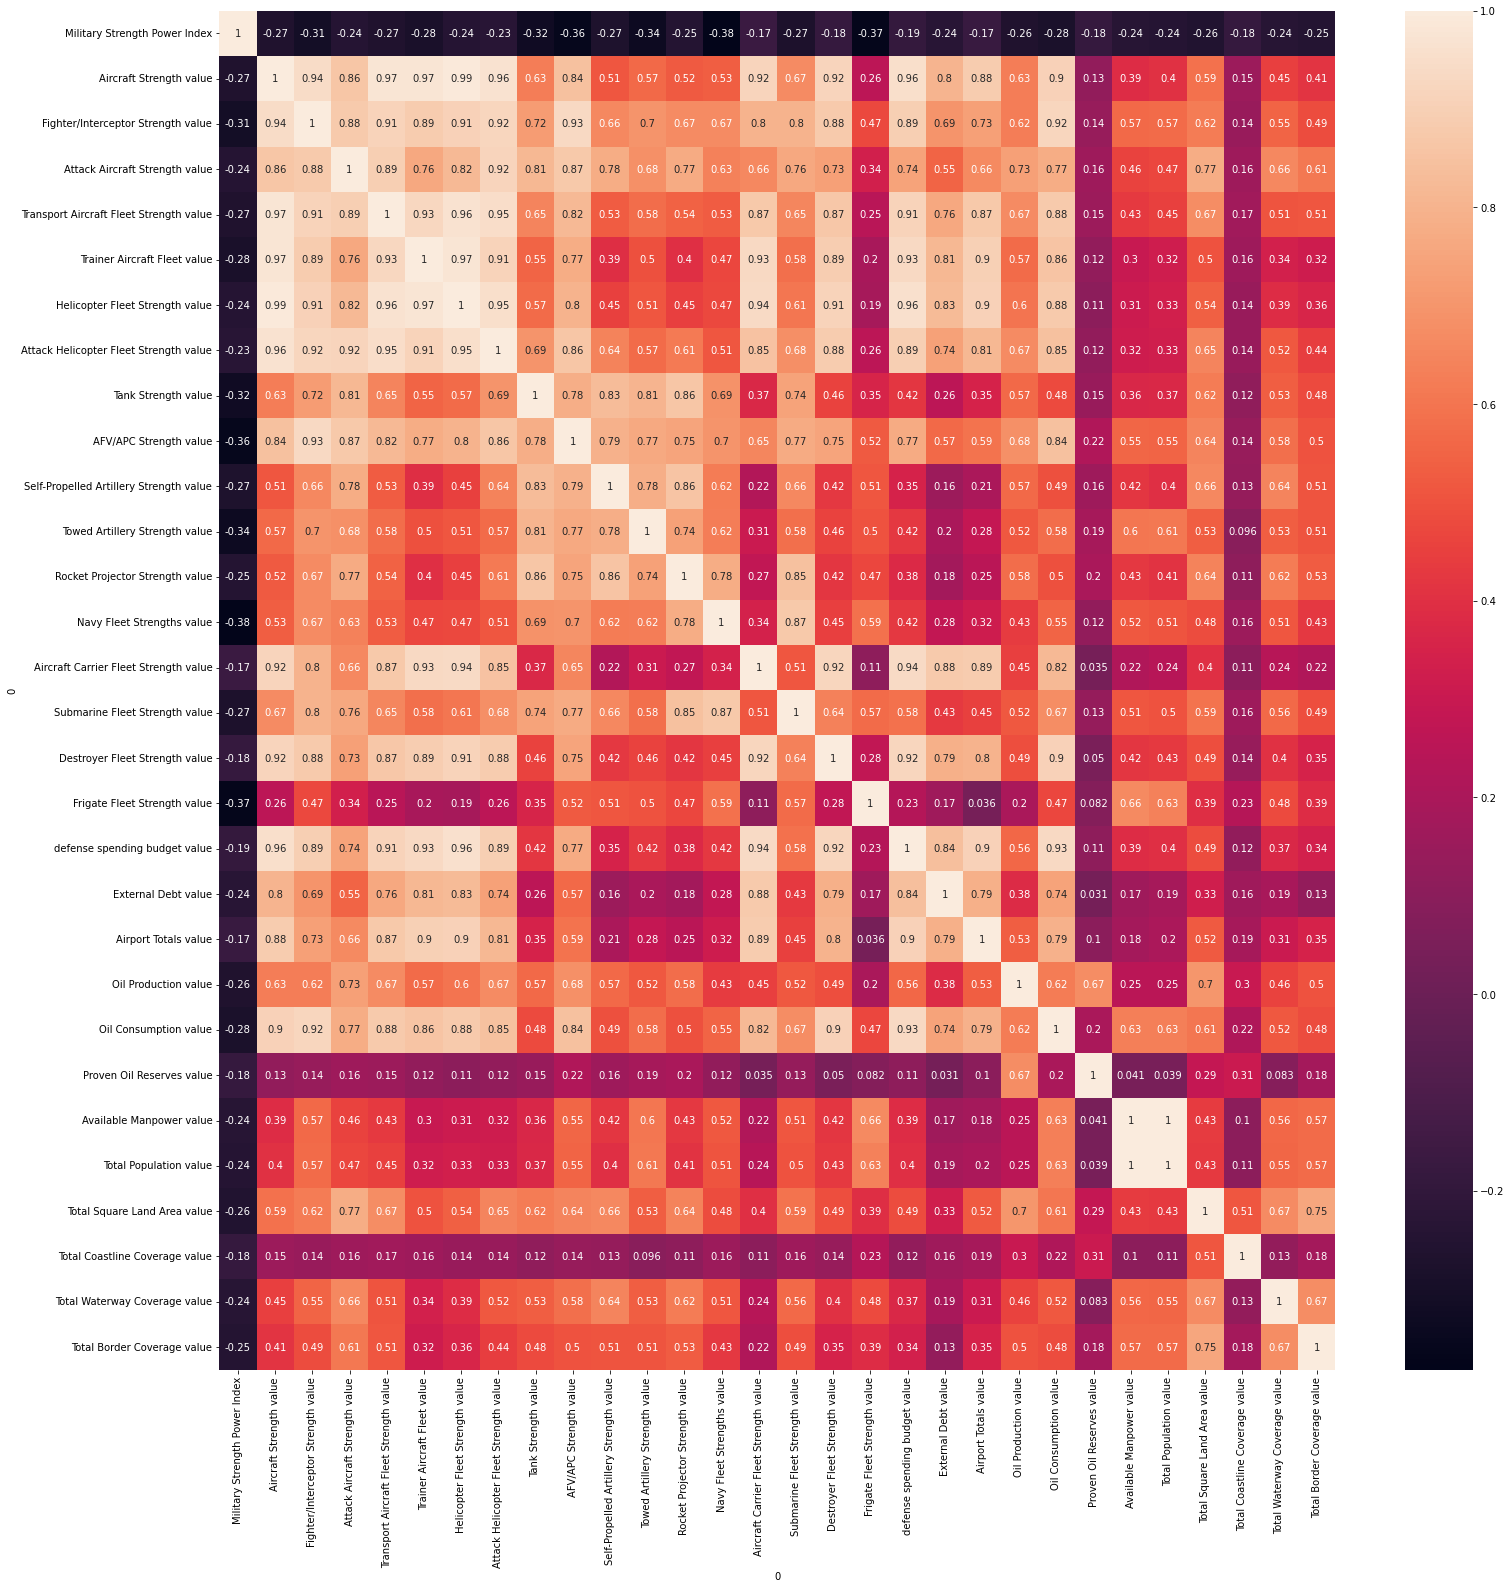

In [242]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)

## Visualy inspect the some features

## Decriptive statistics

# Data Preprocessing

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

### Model Building and label visualisation

### Evaluate 

## Hierarchical Clustering

### Dendogram

### Model Building and label visualisation

### Evaluate 